# Validation Set

# Hold_out Validation

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data_knn_classification_cleaned_titanic.csv')

In [3]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
data.shape

(891, 25)

In [5]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [6]:
#seperating the dependent and independent var

x = data.drop(['Survived'], axis=1)
y = data['Survived']

In [31]:
#creating validation set and test set

from sklearn.model_selection import train_test_split
x_train1, x_test,y_train1, y_test = train_test_split(x, y, test_size=0.2, random_state=50, stratify=None)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=0.2, random_state=51, stratify=None)
print('training data : ',x_train.shape,y_train.shape)
print('val data      : ',x_val.shape,y_val.shape)
print('test data     : ',x_test.shape,y_test.shape)

training data :  (569, 24) (569,)
val data      :  (143, 24) (143,)
test data     :  (179, 24) (179,)


In [37]:
#checkin for the distributions in target var in all sets
print(y_train.value_counts()/len(y_train))
print(y_val.value_counts()/len(y_val))
print(y_test.value_counts()/len(y_test))

#here in all the sets the distributionns are different

0    0.639719
1    0.360281
Name: Survived, dtype: float64
0    0.587413
1    0.412587
Name: Survived, dtype: float64
0    0.564246
1    0.435754
Name: Survived, dtype: float64


# Stratified

In [46]:

from sklearn.model_selection import train_test_split
x_train1, x_test,y_train1, y_test = train_test_split(x, y, test_size=0.2, random_state=50, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=0.2, random_state=51, stratify=y_train1)
print('training data : ',x_train.shape,y_train.shape)
print('val data      : ',x_val.shape,y_val.shape)
print('test data     : ',x_test.shape,y_test.shape)

training data :  (569, 24) (569,)
val data      :  (143, 24) (143,)
test data     :  (179, 24) (179,)


In [47]:
#checkin for the distributions in target var in all sets
print(y_train.value_counts()/len(y_train))
print(y_val.value_counts()/len(y_val))
print(y_test.value_counts()/len(y_test))

#here the distribution of classes in all 3 cases are equal

# we need to put some data during the traning time for val ,
#which werent supposed to use in traning, so we use 'K fold cross val'

0    0.616872
1    0.383128
Name: Survived, dtype: float64
0    0.615385
1    0.384615
Name: Survived, dtype: float64
0    0.614525
1    0.385475
Name: Survived, dtype: float64


# K Fold Cross Validation


Procedure:
shuffle the dataset randomly
split the dataset into k groups
    pick a group as a hold out
    take the remaining groups as training and fit the model
    predict and evaluate on the hold out
repeat  until all the group are done

Advantages:
avoids overfitting
consistency of model( since eval on mul models)

Deciding k:

5<k<10
validation set = statistically significant

k=2, 50-50 spit, high bias
k>10, more data for traning ,more models
k= no of observations--> leave one out( n instances , n models)
considering one at a time

used only for dataset with less than 100 instances

--> leave p out 


In [49]:
data.shape

(891, 25)

In [50]:
x = data.drop(['Survived'], axis=1)
y = data['Survived']

In [54]:
#scaling the data

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

array([[-0.5924806 , -0.50244517, -0.56568542, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 0.63878901,  0.78684529,  1.76776695, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [-0.2846632 , -0.48885426, -0.56568542, ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.        , -0.17626324, -0.56568542, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-0.2846632 , -0.04438104,  1.76776695, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.17706291, -0.49237783, -0.56568542, ..., -0.48204268,
         3.25137334, -1.62380254]])

In [55]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, random_state=96, stratify=y)

In [56]:
#importing KNN clf and metric f1score

from sklearn.neighbors import KNeighborsClassifier as KNN

In [59]:
# K Fold is used to check the consistency of the model
# for consistency we import the cross_val_score

from sklearn.model_selection import cross_val_score as cvs
score = cvs(KNN(n_neighbors = 1), X = x_train, y = y_train, cv = 10)
score

array([0.68656716, 0.67164179, 0.7761194 , 0.73134328, 0.62686567,
       0.71641791, 0.85074627, 0.79104478, 0.81818182, 0.6969697 ])

In [60]:
#consistency is checked using the standard deviation and mean

score.mean()*100, score.std()*100

#the values are obtained for the k values as 1 , they  might chaage if k changes

(73.65897783808232, 6.706785119259538)

In [61]:
# to find the best k valaues, such that we result in good consistency

def Val_score(n_neighbors):
    avg = []
    std = []
    
    for i in n_neighbors:
        # 10 folds cross validation for every value of n_neighbors
        score = cvs(KNN(n_neighbors = i), X = x_train, y = y_train, cv = 10)
        avg.append(score.mean())
        std.append(score.std())
    return avg, std
        

In [63]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)
mean

[0.7365897783808232,
 0.7485300768882859,
 0.7709859791949344,
 0.7755088195386703,
 0.7665309814563546,
 0.7725463591135233,
 0.781524197195839,
 0.7830393487109906,
 0.7680235187697874,
 0.784486657620986,
 0.7784486657620986,
 0.7874265038444143,
 0.7754183627317957,
 0.7889190411578472,
 0.7725011307100861,
 0.7829262777023971,
 0.7754635911352329,
 0.7844188150158299,
 0.7799412030755314,
 0.7754409769335143,
 0.7739258254183627,
 0.7754862053369516,
 0.781456354590683,
 0.7769335142469471,
 0.7829262777023971,
 0.7814337403889644,
 0.7844414292175486,
 0.7739936680235189,
 0.7709633649932158,
 0.7769561284486657,
 0.7724785165083672,
 0.7784486657620986,
 0.7709633649932157,
 0.7739484396200813,
 0.7724559023066485,
 0.7784712799638173,
 0.7724559023066485,
 0.7664631388511987,
 0.7680009045680688,
 0.7635232926277703,
 0.7605156037991858,
 0.7709859791949344,
 0.7650158299412031,
 0.7680235187697874,
 0.7590456806874718,
 0.7665762098597919,
 0.7560606060606061,
 0.7695386702849

Text(0.5, 1.0, 'Validation scores for mean and std')

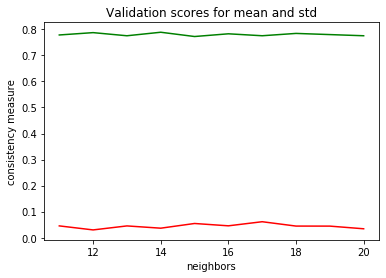

In [66]:
# plotting the mean validation score for each k
plt.plot(n_neighbors[10:20], mean[10:20], color ='green', label ='mean')
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'std')
plt.xlabel('neighbors')
plt.ylabel('consistency measure')
plt.title('Validation scores for mean and std')

In [75]:
#
clf =KNN(n_neighbors = 14)
clf.fit(x_train, y_train)
score1 = clf.score(x_train, y_train)
score = clf.score(x_test, y_test)
score1, score

(0.811377245508982, 0.8161434977578476)

In [ ]:
2014/